# Large-Scale Exploratory Data Analysis of NYC Ferry Ridership

## Objective
Perform a large-scale exploratory data analysis on NYC Ferry ridership data to uncover
temporal, route-level, stop-level, and directional demand patterns using memory-efficient
data processing techniques.

## Dataset
- Source: NYC Open Data – NYC Ferry Ridership
- Size: ~2.74 million records
- Granularity: Hourly ridership by route, stop, and direction

## Approach
- Memory-aware data loading and preprocessing
- Aggregation-based exploratory analysis
- Insight-driven summaries suitable for downstream visualization (Tableau)


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:,.2f}".format)

print("Environment ready")


Environment ready


In [17]:
DATA_PATH = "../data/raw/NYC_Ferry_Ridership.csv"

df = pd.read_csv(
    DATA_PATH,
    parse_dates=["Date"],
    dtype={
        "Hour": "Int8",
        "Route": "category",
        "Direction": "category",
        "Stop": "category",
        "TypeDay": "category"
    }
)

In [18]:
df.shape

(2760654, 7)

In [19]:
# Remove commas and convert Boardings to numeric
df["Boardings"] = (
    df["Boardings"]
    .astype(str)
    .str.replace(",", "", regex=False)
)

df["Boardings"] = pd.to_numeric(df["Boardings"], errors="coerce").astype("Int32")

df["Boardings"].isna().sum()

np.int64(82)

In [20]:
df.isnull().sum()

Date          0
Hour         56
Route         0
Direction     0
Stop          0
Boardings    82
TypeDay       0
dtype: int64

In [21]:
df = df.dropna(subset=["Hour", "Boardings"])
df.isnull().sum()

Date         0
Hour         0
Route        0
Direction    0
Stop         0
Boardings    0
TypeDay      0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df["Direction"] = df["Direction"].replace("(blank)", pd.NA)
df = df.dropna(subset=["Direction"])
df["Direction"].cat.categories

Index(['NB', 'SB'], dtype='object')

In [24]:
df.head(20)

,Date,Hour,Route,Direction,Stop,Boardings,TypeDay
0,2025-10-31,17,SG,SB,Midtown West/W 39th St-Pier 79,60,Weekday
1,2025-10-31,17,SG,NB,Battery Park City/Vesey St.,14,Weekday
2,2025-10-31,17,SG,NB,St. George,50,Weekday
3,2025-10-31,17,SG,NB,Midtown West/W 39th St-Pier 79,0,Weekday
4,2025-10-31,17,SB,SB,Dumbo,8,Weekday
5,2025-10-31,17,SB,SB,Wall St/Pier 11,57,Weekday
6,2025-10-31,17,SB,SB,Sunset Park/BAT,0,Weekday
7,2025-10-31,17,SB,SB,Red Hook/Atlantic Basin,0,Weekday
8,2025-10-31,17,SB,SB,Gov. Island/Yankee Pier,0,Weekday
9,2025-10-31,17,SB,SB,Corlears Hook,3,Weekday


In [25]:
df.tail(20)

,Date,Hour,Route,Direction,Stop,Boardings,TypeDay
2760634,2017-07-01,7,SB,SB,Dumbo/BBP Pier 1,0,Weekend
2760635,2017-07-01,7,SB,SB,Bay Ridge,0,Weekend
2760636,2017-07-01,7,SB,SB,Atlantic Ave/BBP Pier 6,0,Weekend
2760637,2017-07-01,7,SB,NB,Wall St/Pier 11,0,Weekend
2760638,2017-07-01,7,SB,NB,Sunset Park/BAT,0,Weekend
2760639,2017-07-01,7,SB,NB,Red Hook/Atlantic Basin,4,Weekend
2760640,2017-07-01,7,SB,NB,Dumbo/BBP Pier 1,0,Weekend
2760641,2017-07-01,7,SB,NB,Bay Ridge,4,Weekend
2760642,2017-07-01,7,SB,NB,Atlantic Ave/BBP Pier 6,0,Weekend
2760643,2017-07-01,7,RW,SB,Wall St/Pier 11,10,Weekend


## Temporal Analysis

This section analyzes how NYC Ferry ridership varies over time, focusing on
hourly demand patterns and differences between weekdays and weekends.


In [41]:
hourly_ridership = (
    df.groupby("Hour",observed=True)["Boardings"]
    .sum()
    .reset_index()
    .sort_values("Hour")
)

hourly_ridership.head(20)

,Hour,Boardings
0,0,840
1,5,158841
2,6,671819
3,7,2274444
4,8,3176823
5,9,2354370
6,10,2160834
7,11,2722035
8,12,3108597
9,13,3347818


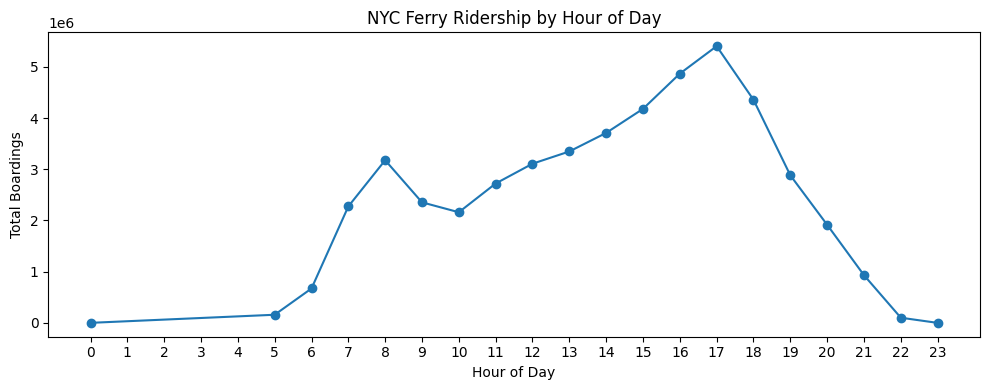

In [27]:
plt.figure(figsize=(10, 4))
plt.plot(
    hourly_ridership["Hour"],
    hourly_ridership["Boardings"],
    marker="o"
)

plt.title("NYC Ferry Ridership by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Boardings")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


In [28]:
day_type_summary = (
    df.groupby("TypeDay", observed=True)["Boardings"]
      .agg(total_boardings="sum", average_boardings="mean")
      .reset_index()
)

day_type_summary


,TypeDay,total_boardings,average_boardings
0,Weekday,32197996,15.85
1,Weekend,16127786,22.13


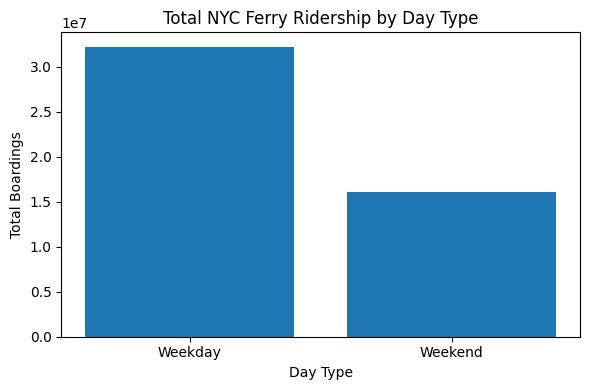

In [29]:
plt.figure(figsize=(6, 4))
plt.bar(
    day_type_summary["TypeDay"],
    day_type_summary["total_boardings"]
)

plt.title("Total NYC Ferry Ridership by Day Type")
plt.xlabel("Day Type")
plt.ylabel("Total Boardings")
plt.tight_layout()
plt.show()


## Route-Level Analysis

This section examines how ridership is distributed across NYC Ferry routes
to identify high-demand routes and overall concentration patterns.


In [30]:
route_ridership = (
    df.groupby("Route", observed=True)["Boardings"]
      .sum()
      .reset_index()
      .sort_values("Boardings", ascending=False)
)

route_ridership.head(10)


,Route,Boardings
1,ER,18542143
0,AS,9781098
5,SB,5709224
4,RW,5700575
7,SV,5272249
6,SG,2231192
8,LE,563772
2,GI,483794
3,RR,41735


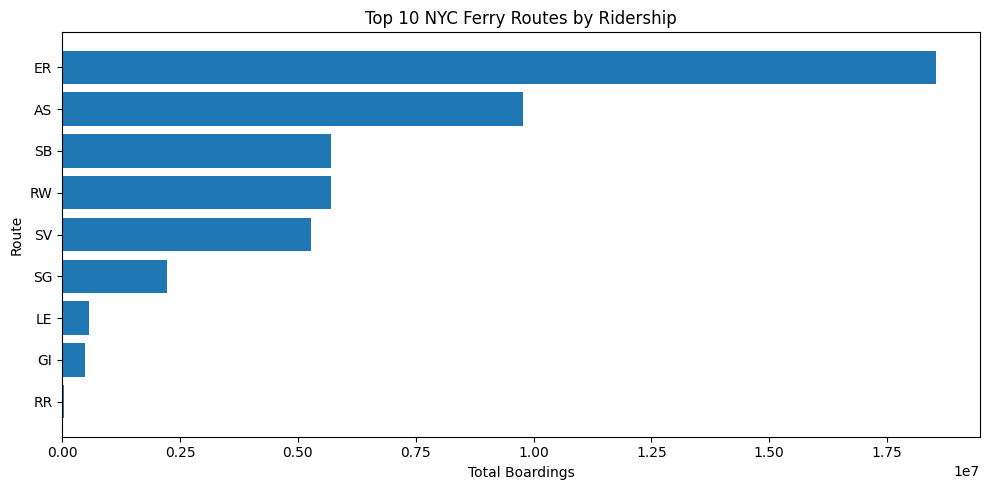

In [31]:
top_routes = route_ridership.head(10)

plt.figure(figsize=(10, 5))
plt.barh(
    top_routes["Route"],
    top_routes["Boardings"]
)
plt.title("Top 10 NYC Ferry Routes by Ridership")
plt.xlabel("Total Boardings")
plt.ylabel("Route")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [32]:
top_5_share = (
    route_ridership.head(5)["Boardings"].sum()
    / route_ridership["Boardings"].sum()
)

top_5_share

np.float64(0.9312894098640763)

## Stop-Level Analysis

This section analyzes ridership distribution across ferry stops to identify
high-traffic hubs and assess how demand is concentrated geographically.


In [33]:
stop_ridership = (
    df.groupby("Stop", observed=True)["Boardings"]
      .sum()
      .reset_index()
      .sort_values("Boardings", ascending=False)
)

stop_ridership.head(10)

,Stop,Boardings
27,Wall St/Pier 11,10803965
9,East 34th Street,6498148
18,North Williamsburg,3258963
8,Dumbo/Fulton Ferry,2598921
20,Rockaway,2548710
10,East 90th St,1988976
7,Dumbo/BBP Pier 1,1923146
16,Long Island City,1881509
15,Hunters Point South,1838632
0,Astoria,1780439


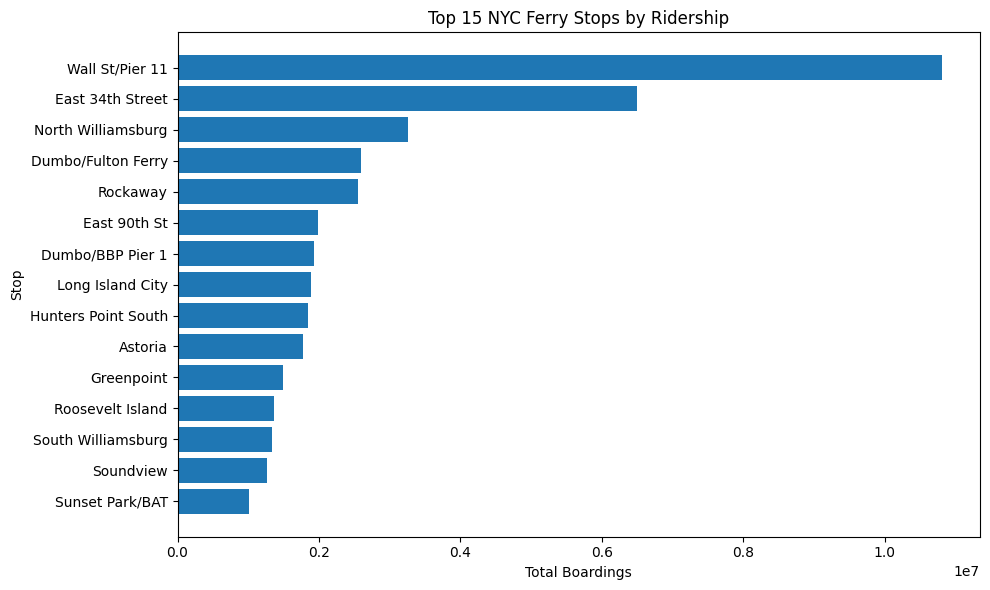

In [34]:
top_stops = stop_ridership.head(15)

plt.figure(figsize=(10, 6))
plt.barh(
    top_stops["Stop"],
    top_stops["Boardings"]
)
plt.title("Top 15 NYC Ferry Stops by Ridership")
plt.xlabel("Total Boardings")
plt.ylabel("Stop")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [35]:
top_10_stop_share = (
    stop_ridership.head(10)["Boardings"].sum()
    / stop_ridership["Boardings"].sum()
)

top_10_stop_share

np.float64(0.7267633868811476)

## Directional Flow Analysis

This section examines ridership patterns by travel direction to assess
whether ferry demand is balanced or directionally skewed.


In [36]:
direction_ridership = (
    df.groupby("Direction", observed=True)["Boardings"]
      .sum()
      .reset_index()
)

direction_ridership

,Direction,Boardings
0,NB,23479363
1,SB,24846419


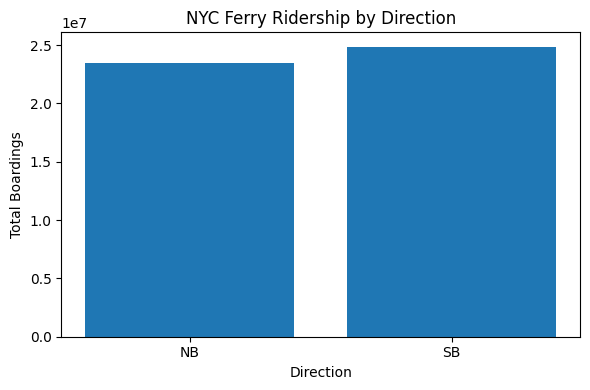

In [37]:
plt.figure(figsize=(6, 4))
plt.bar(
    direction_ridership["Direction"],
    direction_ridership["Boardings"]
)
plt.title("NYC Ferry Ridership by Direction")
plt.xlabel("Direction")
plt.ylabel("Total Boardings")
plt.tight_layout()
plt.show()


In [38]:
direction_ridership.assign(
    share=direction_ridership["Boardings"]
    / direction_ridership["Boardings"].sum()
)

,Direction,Boardings,share
0,NB,23479363,0.49
1,SB,24846419,0.51


## Key Insights

### 1. Strong Temporal Demand Peaks
Ferry ridership exhibits clear morning and evening peaks, reflecting commuter-driven usage patterns. Demand rises sharply after early morning hours, peaks in the late afternoon, and declines significantly during late-night periods.

### 2. Highly Concentrated Route Usage
Ridership is heavily concentrated across a small subset of ferry routes. The top five routes account for the majority of total boardings, highlighting uneven demand distribution across the network.

### 3. Stop-Level Demand Is Hub-Dominated
A limited number of ferry stops act as major demand hubs. Locations such as Wall St/Pier 11 and East 34th Street contribute disproportionately to overall ridership, indicating strong spatial centralization.


## EDA Summary & Next Steps

This exploratory analysis reveals that NYC Ferry ridership exhibits strong temporal structure, with clear long-term trends and recurring seasonal patterns across months and years. Ridership levels show persistence over time, indicating that past demand is informative of future demand.

Route-level analysis suggests that a subset of routes contributes disproportionately to total ridership, while others display higher volatility, motivating aggregation strategies for stable forecasting. Additionally, external shocks such as the COVID-19 period introduce temporary disruptions, followed by a gradual stabilization phase.

Overall, the presence of trend, seasonality, and temporal dependence supports the use of time-series forecasting approaches. Based on these findings, the next phase of the project focuses on feature engineering (lagged values, calendar effects, and rolling statistics) and predictive modeling, which are handled in a separate notebook.


In [39]:
import os
os.makedirs("../data/processed", exist_ok=True)

# Export temporal summaries
hourly_ridership.to_csv(
    "../data/processed/hourly_ridership.csv",
    index=False
)

day_type_summary.to_csv(
    "../data/processed/day_type_summary.csv",
    index=False
)

# Export route and stop summaries
route_ridership.to_csv(
    "../data/processed/route_ridership.csv",
    index=False
)

stop_ridership.to_csv(
    "../data/processed/stop_ridership.csv",
    index=False
)

# Export directional summary (cleaned)
direction_ridership.to_csv(
    "../data/processed/direction_ridership.csv",
    index=False
)

print("Processed datasets exported successfully.")

Processed datasets exported successfully.


In [40]:
OUTPUT_PATH = "../data/processed/cleaned_ferry_ridership.csv"

df.to_csv(OUTPUT_PATH, index=False)

print(f"Cleaned dataset saved to {OUTPUT_PATH}")
print("Shape:", df.shape)

Cleaned dataset saved to ../data/processed/cleaned_ferry_ridership.csv
Shape: (2760352, 7)
